# Explore here

Sistema de predicción de ventas 

Queremos establecer el almacén de nuestra empresa en otra localización y necesitamos estimar el ritmo de las ventas, que desde la creación de la empresa ha ido en aumento, para los próximos meses, a fin de proveer el espacio que necesitaremos.

In [1]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Evaluamos el df
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [3]:
# Identificacion de valores nulos
df['date'] = pd.to_datetime(df['date'], errors='coerce')
if df['date'].isnull().any():
    print("Hay valores nulos en la columna 'date' después de la conversión:")
    print(df[df['date'].isnull()])
else:
    print("No hay valores nulos en la columna 'date' después de la conversión")
df = df.dropna(subset=['date'])

# Formatear la fecha al formato dd/mm/aaaa
# df['date'] = df['date'].dt.strftime('%d/%m/%Y')

df = df.set_index("date")
ts = df["sales"]
ts.head()

No hay valores nulos en la columna 'date' después de la conversión


date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

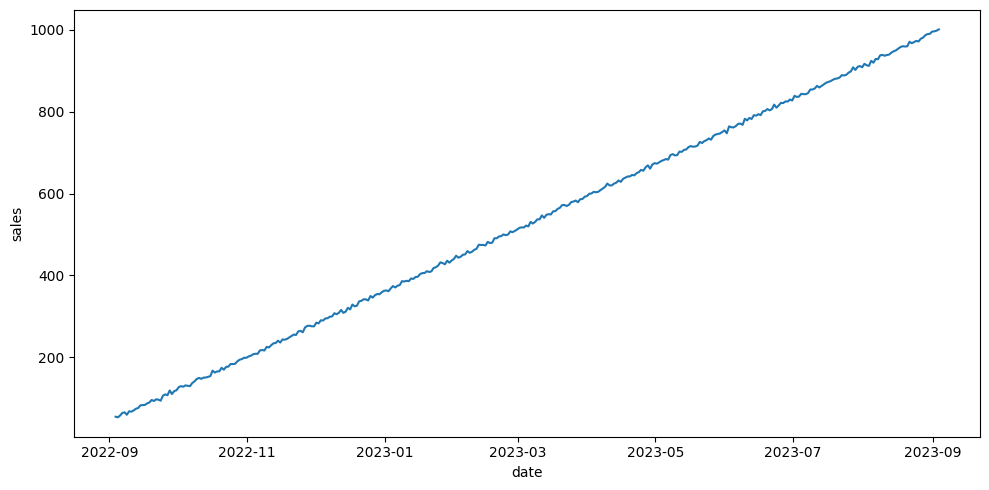

In [4]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
plt.tight_layout()
plt.show()

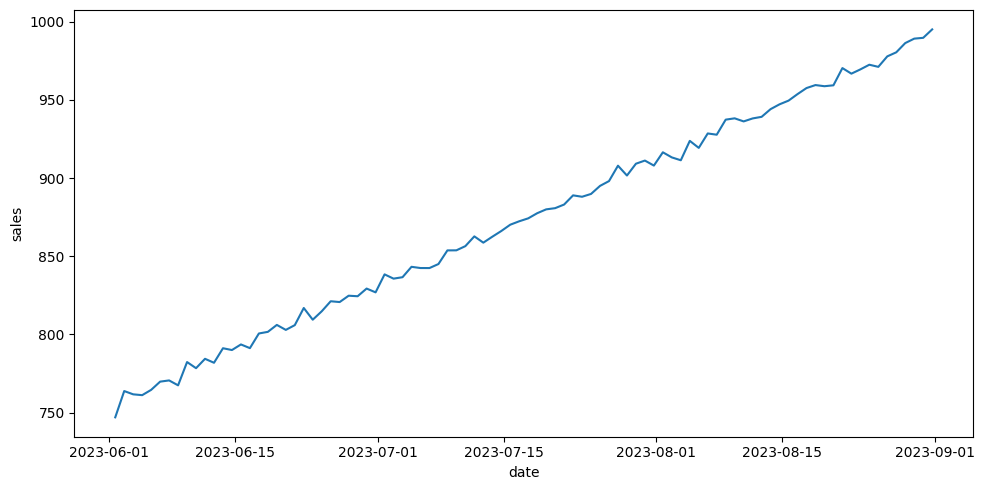

In [5]:
# Hagamos un zoom para ver la linea de tendencia

start_date = "2023-06"
end_date = "2023-09"

# selecciono periodo de observación
periodo = (ts.index> start_date) & (ts.index <= end_date)

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts.loc[periodo])

plt.tight_layout()

plt.show()

¿Cuál es el tensor de la serie temporal? : Diario 

¿Cuál es la tendencia? : ascendente

¿Es estacionaria? : nuestra test de Dickey-Fuller es nula será rechazada y tomaremos esta serie como no estacionaria.

¿Existe variabilidad o presencia de ruido? :

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf


Descomposicion de una serie temporal: separa de una serie de tiempo en varios elementos diferenciados.
Cada uno de estos componentes representa una parte de la estructura subyacente de la serie temporal.

In [7]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition


Analisis de la Tendencia: Para acceder a su información recurrimos al componente trend del resultado decomposition.

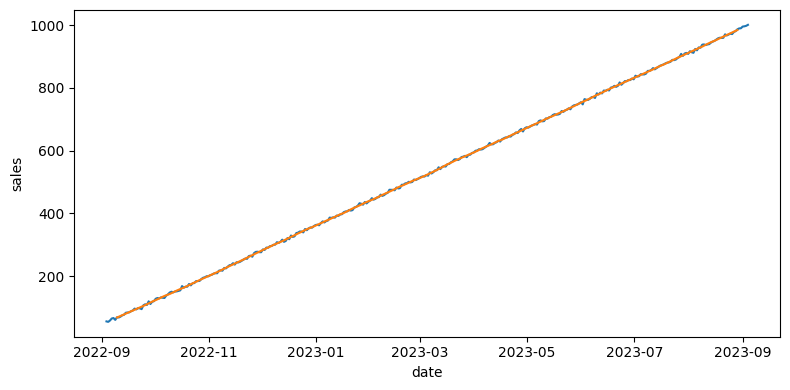

In [8]:
# A continuación visualizaremos la serie temporal:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

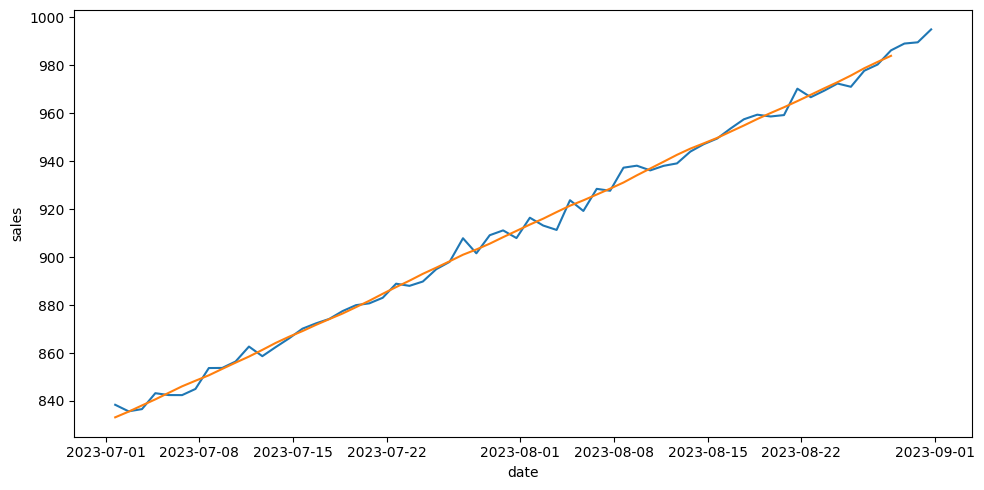

In [9]:
# Hagamos un zoom para ver la linea de tendencia del analisis temporal

start_date = "2023-07"
end_date = "2023-09"

# selecciono periodo de observación
periodo = (ts.index> start_date) & (ts.index <= end_date)

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts.loc[periodo])
sns.lineplot(data = trend.loc[periodo])

plt.tight_layout()

plt.show()

Se confirma la tendencia positiva a lo largo de los años.
Hay un aumento en las ventas a lo largo del tiempo.

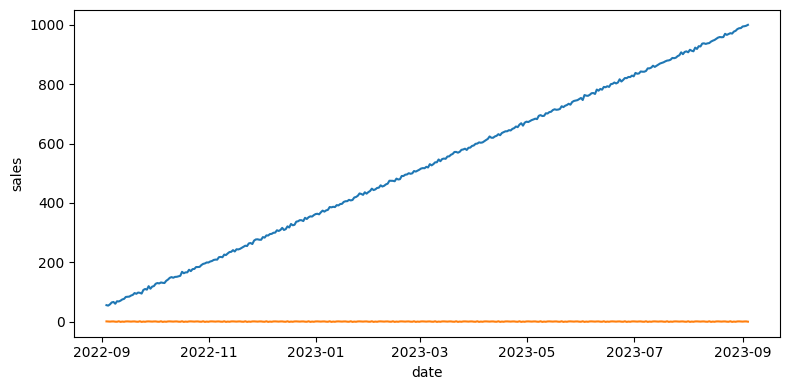

In [10]:
# Analisis de la Estacionalidad ----> Para acceder a su información recurrimos al componente seasonal del resultado decomposition

seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

No entiendo muy bien que estoy interpretando aca

In [11]:
# Estacionalidad de la serie temporal ----> Prueba de Dickey-Fuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [12]:
test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [13]:
# Diferenciar la serie para remover tendencia
ts_sales_new = sns.load_dataset()


ts_sales_new["date"] = pd.to_datetime(ts_sales_new["date"], errors='coerce')

ts_sales_new = ts_sales_new.set_index("date")

# Diferenciar la serie para remover tendencia
ts_sales_new['diff_sales'] = ts_sales_new['sales'].diff().dropna()

ts_sales_dif = ts_sales_new["diff_sales"]
ts_sales_dif.dropna(inplace = True)

ts_sales_dif

TypeError: load_dataset() missing 1 required positional argument: 'name'

De los apuntes de lean 

start_date = "2023-01"
end_date = "2023-03"

# selecciono periodo de observación
periodo = (sales.index> start_date) & (sales.index <= end_date)

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales.loc[periodo])

plt.tight_layout()

plt.show()

arima_model = auto_arima(train, seasonal = False, trace = True)